# 1. Recurrent Neural Networ [RNN]

In [ ]:
import torch
import torch.nn as nn

In [ ]:
input_size = 5
hidden_size = 8

In [ ]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [ ]:
cell = nn.RNN(input_size, hidden_size, batch_first=True) # defines the RNN architecture
#batch_first = True -> indicates that the first dimensionstands for the batch size
#if False, the input should be (10, 5), i,e. (time_steps, input_size), getting rid of the batch_size

In [ ]:
outputs, _status = cell(inputs)

In [ ]:
print(outputs.shape) #hidden_state of every time step (8-dim hidden_state for 10 time steps)

torch.Size([1, 10, 8])


In [ ]:
print(_status.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step)

torch.Size([1, 1, 8])


In [ ]:
#Deeper RNN
inputs2 = torch.Tensor(1, 10, 5)
cell2 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True) # num_layers = 2 -> deeper RNN (default: 1)
outputs2, _status2 = cell2(inputs2)
print(outputs2.shape)
print(_status2.shape)

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


In [ ]:
# Deeper RNN
# (batch_size, time_steps, input_size)
inputs3 = torch.Tensor(1, 10, 5)
cell3 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 3, batch_first=True) # num_layers = 3 -> deeper RNN (default: 1)
outputs3, _status3 = cell3(inputs3)
print(outputs3.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(_status3.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 3 layers

torch.Size([1, 10, 8])
torch.Size([3, 1, 8])


# 2. Long Short Term Memory [LSTM]

In [ ]:
# Deeper LSTM -- only need to change nn.RNN into nn.LSTM
# (batch_size, time_steps, input_size)
inputs4 = torch.Tensor(1, 10, 5)
cell4 = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 4, batch_first=True)
outputs4, (h4, c4) = cell4(inputs4)
print(outputs4.shape)
print(h4.shape)
print(c4.shape)

torch.Size([1, 10, 8])
torch.Size([4, 1, 8])
torch.Size([4, 1, 8])


Question 1.
Write a code for LSTM having 10 internal layers (num_layers = 10) and change the input size into (5, 50, 5). Please stick to the format provided. Check if the size of the output, hidden, and cell state are calculated properly.

In [ ]:
inputs5 = torch.Tensor(5, 50, 5)
cell5 = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 10, batch_first=True)
outputs5, (h5, c5) = cell5(inputs5)
print(outputs5.shape)
print(h5.shape)
print(c5.shape)

torch.Size([5, 50, 8])
torch.Size([10, 5, 8])
torch.Size([10, 5, 8])


Question 2. Describe the limitations of (Vanilla) RNN and how LSTM overcomes these limitations.

Limitations of RNN

(1) Vanishing Gradient Problem: During backpropagation, gradients diminish, making it challenging for the model to remember information from earlier time steps.

(2) Exploding Gradient Problem: Gradients grow rapidly during backpropagation, leading to unstable and unpredictable training

(3) Short-Term Memory: RNN struggle with maintaining information over longer sequences. This limitation makes it difficult for RNNs to learn patterns in data with extended dependencies.

How LSTM overcomes these limitations

(1) Gate Mechanisms: LSTM uses gate mechanisms to control the flow of information through the cell state. This allows the model to selectively pass and store information, preventing unnecessary data loss and facilitating the learning of long-term dependencies

(2) Cell state: It enables LSTMs to maintain information over longer periods. The cell state acts as a conveyor belt, allowing information to flow between cells, ensuring the retnetion of crucial information for extended sequences

(3) Forget Gate: it learns what information to discard from the cell state. This gate allows the model to forget irrelevant details, keeping the cell state focused on important information and imporving the model's ability to capture meaningful patterns


# 3. Gated Recurrent Unit [GRU]

Question 3.
Write a code for GRU having 5 internal layers (num_layers = 5) and change the input size into (3, 45, 7). (Change the input_size adequately) Please stick to the format provided. Check if the size of output and hidden state are calculated properly.

In [ ]:
inputs6 = torch.Tensor(3, 45, 7)
cell6 = nn.GRU(input_size = 7, hidden_size = 8, num_layers = 5, batch_first=True)
outputs6, _status6 = cell6(inputs6)
print(outputs6.shape)
print(_status6.shape)

torch.Size([3, 45, 8])
torch.Size([5, 3, 8])


# 4. On your Own
**Question 4. Choose one or two from the following documents:**


*    **News topic Classification with RNN:** https://glanceyes.com/entry/PyTorch%EB%A1%9C-RNN-%EB%AA%A8%EB%8D%B8-%EA%B5%AC%ED%98%84%ED%95%B4%EB%B3%B4%EA%B8%B0-AG-NEWS-%EB%89%B4%EC%8A%A4-%EA%B8%B0%EC%82%AC-%EC%A3%BC%EC%A0%9C-%EB%B6%84%EB%A5%98
*    **NAVER Movie Review Classification with LSTM:** https://wikidocs.net/217687
*   **IMDB Review Classification with GRU:** https://wikidocs.net/217083
Read it and run the whole code. Write a simplified explanation for each cell.


## GPU 이용한 IMDB 리뷰 분류하기

### 1. 데이터로드 및 단어 토큰화

In [ ]:
import pandas as pd
import numpy as np #데이터 조작 및 수학/통계 연산을 위한 Pandas와 Numpy 라이브러리
import matplotlib.pyplot as plt #Matplotlib: 데이터 시각화
import nltk #NLTK(Natural Language Toolkit): 텍스트 처리 및 자연어 처리 작업에 유용한 함수와 도구 제공
import torch #PyTorch: 신경망 모델 구축, 학습
import urllib.request #Urllib: UPL을 통해 데이터를 다운로드 하거나 열기
from tqdm import tqdm #TQDM: 루프에서 진행 상황을 시각적으로 표시
from collections import Counter #데이터 요소의 개수 쉽게 개산
from nltk.tokenize import word_tokenize #텍스트 토큰화
from sklearn.model_selection import train_test_split #데이터를 훈련 및 테스트 세트로 분할

In [ ]:
nltk.download('punkt') #NLTK 라이브러리의 punkt데이터셋을 다운로드
#punkt 데이터셋: NLTK에서 제공하는 토큰화 tokenization 모듈에 사용되는 데이터 파일
#tokenization: 텍스트를 작은 단위로 나누는 작업 - 주로 단어 또는 문장으로 나누는 데 사용

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")
#urllib.request.urlretrieve 함수를 사용하여 주어진 URL에서 파일을 다운로드
#다운로드된 파일은 IMDB Dataset.csv로 저장

('IMDB Dataset.csv', <http.client.HTTPMessage at 0x7ee42f68bb80>)

In [ ]:
df = pd.read_csv('IMDB Dataset.csv') #Pandas 라이브러리 사용하여 IMDB Dataset.csv 파일을 데이터프레임으로 읽어옴
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.info() #데이터에 결측값이 있는지 확인
#결측값missing values: 데이터 집합에서 어떤 값이나 정보가 비어 있는 상태. 누락된 값, 비어있는 값, 빈

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


reviwe 열과 sentiment 열 모두 non-null(결측값이 아닌) 데이터가 5만개로 확인되므로 결측값이 없다.

In [ ]:
print('결측값 여부 :',df.isnull().values.any()) #.isnull().values.any() 를 사용하여 결측값 여부 확인

결측값 여부 : False


<Axes: xlabel='sentiment'>

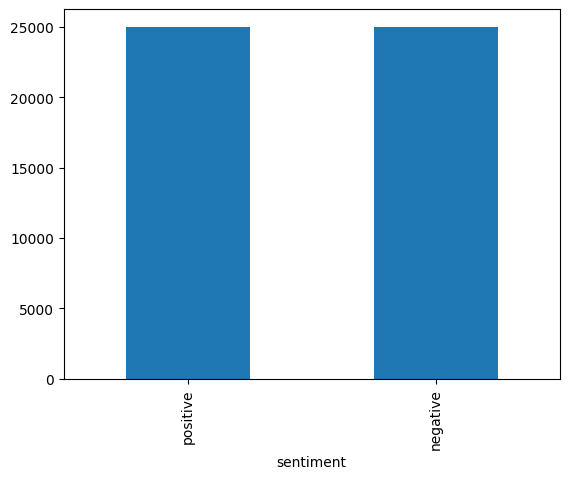

In [ ]:
df['sentiment'].value_counts().plot(kind='bar') #레이블이 균등한지 Bar Chart를 통해 확인

In [ ]:
print('레이블 개수') #레이블의 실제 개수 확인
print(df.groupby('sentiment').size().reset_index(name='count'))

레이블 개수
  sentiment  count
0  negative  25000
1  positive  25000


In [ ]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0]) # 현재 레이블 'positive', 'negative'를 각각 1, 0 으로 변환
df.head() #정상 변환되었는지 확인하기 위해 상위 5개 행을 출력

/tmp/ipykernel_34/3497176362.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0]) # 현재 레이블 'positive', 'negative'를 각각 1, 0 으로 변환


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
X_data = df['review']
y_data = df['sentiment']
print('영화 리뷰의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

영화 리뷰의 개수: 50000
레이블의 개수: 50000


In [ ]:
#훈련 데이터, 검증 데이터, 테스트 데이터로 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0, stratify=y_data) #훈련 데이터와 테스트 데이터 5;5
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0, stratify=y_train) #훈련 데이터를 다시 8:2로 훈련 데이터와 검증 데이터로 분류

print('--------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_valid.value_counts()[0]/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_valid.value_counts()[1]/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------훈련 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------테스트 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%


In [ ]:
#토큰화
def tokenize(sentences):
  tokenized_sentences = []
  for sent in tqdm(sentences):
    tokenized_sent = word_tokenize(sent)
    tokenized_sent = [word.lower() for word in tokenized_sent]
    tokenized_sentences.append(tokenized_sent)
  return tokenized_sentences

tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)

100%|██████████| 25000/25000 [01:12<00:00, 343.71it/s]


In [ ]:
# 상위 샘플 2개 출력
for sent in tokenized_X_train[:2]:
  print(sent)

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

### 2. Vocab 만들기

In [ ]:
word_list = []
for sent in tokenized_X_train:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list) #Counter 모듈을 사용하면 현재 갖고 있는 데이터에 존재하는 단어 종류의 총 개수와 각 단어에 대해서 등장 빈도를 카운트 할 수 있음
print('총 단어수 :', len(word_counts))

총 단어수 : 102869


In [ ]:
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_counts['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 :', word_counts['love'])

훈련 데이터에서의 단어 the의 등장 횟수 : 265570
훈련 데이터에서의 단어 love의 등장 횟수 : 4972


In [ ]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])

등장 빈도수 상위 10개 단어
['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>']


In [ ]:
# 등장 빈도 수가 3회 미만인 단어들이 데이터에서 얼만큼의 비중을 차지하는 지 확인
threshold = 3
total_cnt = len(word_counts) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 102869
등장 빈도가 2번 이하인 희귀 단어의 수: 63961
단어 집합에서 희귀 단어의 비율: 62.17713791326833
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.372669468808688


등장 빈도 2회 이하인 단어들이 절반 이상 차지하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 1.32%이므로 자연어 처리에서 정수 인코딩 과정에서 배제시킴

In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :', len(vocab))

단어 집합의 크기 : 38908


In [ ]:
#정수0은 패딩을 위해서 사용하는 패딩 토큰인 <PAD>를 할당
#정수1은 OOV(Out-Of-Vocabulary) 문제 발생 시에 모르는 단어에 정수1을 할당하는 용도인 <UNK>를 할당
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)

패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 : 38910


### 3. 정수 인코딩

In [ ]:
#최종 단어 집합(Vocabulary)인 word_to_index를 이용하여 정수 인코딩
#texts_to_sequences(): 주어진 데이터에서 각 단어를 word_to_index에 맵핑된 정수로 변환
#word_to_index에 존재하지 않는 단어가 등장한 경우에는 정수 1 부여
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

encoded_X_train = texts_to_sequences(tokenized_X_train, word_to_index)
encoded_X_valid = texts_to_sequences(tokenized_X_valid, word_to_index)
encoded_X_test = texts_to_sequences(tokenized_X_test, word_to_index)

In [ ]:
# 상위 샘플 2개 출력
for sent in encoded_X_train[:2]:
  print(sent)

[38, 29, 139, 3, 52, 54, 29, 38, 3, 5, 3401, 47, 19, 95, 22, 29, 160, 4051, 6, 1751, 3, 47, 29, 292, 39, 468, 217, 3, 6, 47, 29, 133, 73, 529, 61, 59, 25245, 129, 213, 44, 248, 2, 188, 114, 58, 29, 41, 12, 13, 10, 11, 12, 13, 10, 11, 382, 3, 382, 252, 26, 4, 57, 29, 38, 5, 2275, 1578, 23, 1467, 3, 17, 9, 5770, 8, 111, 29, 1428, 73, 529, 140, 672, 4, 16, 342, 8, 125, 17, 24, 43, 2, 76, 63, 16, 20, 5, 136, 535, 3, 6, 16, 171, 18, 164, 3, 42, 672, 12081, 3, 16, 133, 14, 21, 88, 21, 16, 84, 110, 4, 16, 94, 129, 1117, 30, 5, 492, 121, 110, 3, 6, 16, 144, 54, 31, 120, 16, 74, 41, 16, 133, 43, 300, 7, 2, 1467, 4, 2, 423, 203, 66, 167, 6, 3956, 3, 50, 5, 1964, 3, 25, 19730, 252, 4, 16, 54, 133, 576, 3, 6, 105, 42, 2, 151, 36, 541, 18, 36, 55, 5, 252, 42, 246, 4, 928, 3, 420, 3, 25, 40, 226, 405, 18, 17, 9, 964, 8, 39, 5, 252, 26, 3, 6, 14, 17349, 18, 233, 868, 4, 7993, 55, 53, 2, 415, 4960, 7, 33, 1, 32, 6, 2659, 9, 2, 415, 1, 2145, 8, 2, 206, 3, 8986, 13015, 12, 13, 10, 11, 12, 13, 10, 11, 2,

In [ ]:
#정수 인코딩 된 결과를 역으로 복원
#각 단어에 정수가 맵핑된 word_to_index를 반대로 만든 index_to_word를 구현해보고 첫번째 샘플에 대해 복원
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', tokenized_X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

기존의 첫번째 샘플 : ['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!',

### 4. 패딩

서로 다른 길이의 데이터들을 동일한 길이로 일치 시켜주는 작업

리뷰의 최대 길이 : 2818
리뷰의 평균 길이 : 278.8581


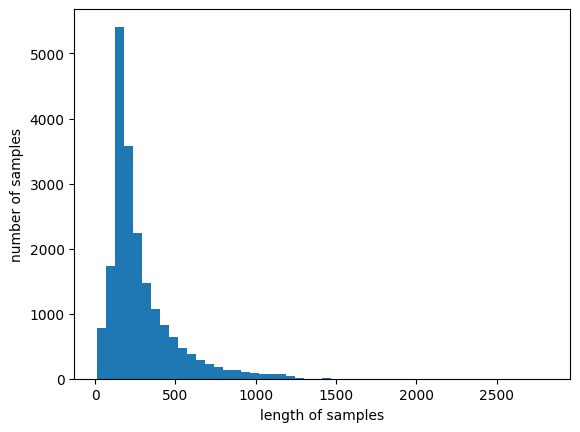

In [ ]:
# 패딩을 위해 훈련 데이터의 최대 길이, 평균 길이, 그리고 데이터의 길이 분포를 확인
print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

가장 긴 샘플의 길이는 2818

전체 데이터의 길이 분포는 대체적으로 약 1000내외의 길이를 가짐.

모델이 처리할 수 있도록 encoded_X_train과 encoded_T_test의 모든 샘플의 길이를 특정 길이로 동일하게 맞춰줄 필요가 있음

특정 길이 변수를 max_len으로 정하기

In [ ]:
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수 만들기
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 500
below_threshold_len(max_len, encoded_X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 87.83


In [ ]:
#pad_sequences(): 패딩 해주는 함수, 최대길이를 정하면 해당 길이보다 긴 데이터는 뒷 부분을 잘라서 해당 길이로 맞추고, 해당 길이보다 짧은 데이터는 뒤에 0을 채워서 해당 길이의 데이터로 변환
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)

훈련 데이터의 크기 : (20000, 500)
검증 데이터의 크기 : (5000, 500)
테스트 데이터의 크기 : (25000, 500)


### 5. 모델

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", device)

cpu와 cuda 중 다음 기기로 학습함: cuda


In [ ]:
# label data를 파이토치의 텐서 타입으로 변환
#상위 5개의 레이블 출력
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))
print(train_label_tensor[:5])

tensor([1, 1, 0, 0, 0])


GRU 모델을 클래스로 구현

입력은 (배치 크기, 문장 길이) 크기를 가지는 텐서

임베딩 층을 지나고 나면 각 단어가 임베딩 벡터로 변환되면서 (배치 크기, 문장 길이, 임베딩 벡터의 차원)으로 텐서의 크기가 변환

GRU의 마지막 시점의 은닉 상태(hidden state)값을 출력층과 연결시키는 작업 필요. 이때, GRU가 출력층으로 보는 결과값의 차원은 (배치 크기, 은닉 상태의 차원)을 가져야 함.

마지막 시점의 은닉 상태의 값만 전달하므로, 은닉 상태는 모든 시점(문장 길이)만큼 존재하는 것이 아니라 단 하나만 있음. 출력층은 지난 결과는 소프트 맥스 회귀를 수행하므로 (배치 크기, 분류하고자 하는 카테고리의 수)의 차원을 가짐

후 각 데이터를 배치 단위로 데이터 묶음을 꺼낼 수 있는 데이터로더로 전달.


- 단어 벡터의 차원 = 100
- 문장 길이 = 500
- 배치 크기 = 32
- 데이터 개수 = 2만
- GRU의 은닉층의 크기 = 128
- 분류하고자 하는 카테고리 개수 = 2개

데이터의 변화

(32, 500) => 입력 데이터의 형태 => 임베딩 층 통과 후 => (32, 500, 100) => GRU 통과 후 => (32, 128) => Softmax 출력층 통과 후 => (32, 2)

In [ ]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim) # output_dim = 분류하고자하는 카테고리의 개수

    def forward(self, x):
        # x: (batch_size, seq_length) == (32, 500)
        embedded = self.embedding(x)  # (batch_size, seq_length, embedding_dim) == (32, 500, 100) == (데이터의 개수, 문장길이, 단어 벡터의 차원)
        gru_out, hidden = self.gru(embedded)  # gru_out: (batch_size, seq_length, hidden_dim), hidden: (1, batch_size, hidden_dim)
        last_hidden = hidden.squeeze(0)  # (batch_size, hidden_dim)
        logits = self.fc(last_hidden)  # (batch_size, output_dim)
        return logits

In [ ]:
# 훈련 데이터, 검증 데이터, 테스트 데이터에 대해서 파이토치 텐서로 변환하고 배치 단위 연산을 위해 데이터로더로 변환
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)

In [ ]:
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 625


In [ ]:
#모델 객체 선언
embedding_dim = 100
hidden_dim = 128
output_dim = 2
learning_rate = 0.01
num_epochs = 10

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)

TextClassifier(
  (embedding): Embedding(38910, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss() #파이토치로 자연어 처리를 하게 되면 가장 많이 사용하게 되는 손실함수
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### 6. 평가 코드 작성

In [ ]:
#모델의 정확도 측정
def calculate_accuracy(logits, labels):
    # _, predicted = torch.max(logits, 1)
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

In [ ]:
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval() #모델을 평가모드로 설정
    with torch.no_grad():
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 모델의 예측값
            logits = model(batch_X)

            # 손실을 계산
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy

### 7. 학습

In [ ]:
num_epochs = 5

# Training loop
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    # Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    for batch_X, batch_y in train_dataloader:
        # Forward pass
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        # batch_X.shape == (batch_size, max_len)
        logits = model(batch_X)

        # Compute loss
        loss = criterion(logits, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy and loss
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    # Validation
    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')

Epoch 1/5:
Train Loss: 0.6972, Train Accuracy: 0.5006
Validation Loss: 0.6946, Validation Accuracy: 0.4978
Validation loss improved from inf to 0.6946. 체크포인트를 저장합니다.
Epoch 2/5:
Train Loss: 0.6923, Train Accuracy: 0.5154
Validation Loss: 0.6942, Validation Accuracy: 0.5052
Validation loss improved from 0.6946 to 0.6942. 체크포인트를 저장합니다.
Epoch 3/5:
Train Loss: 0.6838, Train Accuracy: 0.5200
Validation Loss: 0.6957, Validation Accuracy: 0.5058
Epoch 4/5:
Train Loss: 0.6613, Train Accuracy: 0.5471
Validation Loss: 0.6744, Validation Accuracy: 0.6116
Validation loss improved from 0.6942 to 0.6744. 체크포인트를 저장합니다.
Epoch 5/5:
Train Loss: 0.5464, Train Accuracy: 0.7306
Validation Loss: 0.5045, Validation Accuracy: 0.7796
Validation loss improved from 0.6744 to 0.5045. 체크포인트를 저장합니다.


### 8. 모델 로드 및 평가

In [ ]:
# 모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델을 device에 올립니다.
model.to(device)

TextClassifier(
  (embedding): Embedding(38910, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [ ]:
# 검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')

Best model validation loss: 0.5045
Best model validation accuracy: 0.7796


In [ ]:
# 테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')

Best model test loss: 0.5016
Best model test accuracy: 0.7764


### 9. 모델 테스트

In [ ]:
index_to_tag = {0 : '부정', 1 : '긍정'}

def predict(text, model, word_to_index, index_to_tag):
    # 모델 평가 모드
    model.eval()

    # 토큰화 및 정수 인코딩. OOV 문제 발생 시 <UNK> 토큰에 해당하는 인덱스 1 할당
    tokens = word_tokenize(text)
    token_indices = [word_to_index.get(token.lower(), 1) for token in tokens]

    # 리스트를 텐서로 변경
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)  # (1, seq_length)

    # 모델의 예측
    with torch.no_grad():
        logits = model(input_tensor)  # (1, output_dim)

    # 레이블 인덱스 예측
    _, predicted_index = torch.max(logits, dim=1)  # (1,)

    # 인덱스와 매칭되는 카테고리 문자열로 변경
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag

In [ ]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

predict(test_input, model, word_to_index, index_to_tag)

'부정'

In [ ]:
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

predict(test_input, model, word_to_index, index_to_tag)

'긍정'